# Data Analysis - Coursework 1 (35%)

***

Short Style Data Analysis Questions
Deadline Thursday week 6, 2pm.

***

**INSTRUCTIONS**

This coursework assesses learning outcomes from Chapters 1 - 4 of the course.

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. **Note that you will need to upload your final notebook exported as a pdf.** Don't forget to execute all of your cells before you export the notebook to pdf. You can constantly resubmit your turnitin document until the deadline.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- Please also take note of the University’s policy on **plagiarism**, which is outlined in your student handbook.

**AIMS OF THE ASSESSMENT**

The assessment will evidence your ability to synthesise the tools provided during weeks 1-5 and how you communicate it to the audience.


1.	Ability to identify the correct statistical method with sound reasoning.
2.	Evidence of knowledge of the assumptions made or infered from the question.
3.	Application of the statistical method, including correct treatment of the given / inferred data. 
4.	Critical explanations and interpretation of the results, ability to turn raw data into a statistically correct statement

Specific requirements and guidance

- For short-form questions (for example question 1 on CA 1), marks are given in steps for the correct answer and reasoning. 
- In longer form questions there are a small proportion of marks allocated for additional work beyond the basic principles outlined in the question. This is intended to recognise student work that goes beyond the basic investigation and shows evidence of insight and use of appropriate tools. 


Major lapses 

- Full marks cannot be awarded if there is no explanation or justification of the method/approach/equations/statistical tool used. 
- If the question is answered correctly but there is no explanation of the reasoning being used to answer the question, the maximum mark that can be awarded for that (sub)question is 60%. 
- If the question is correct with explanations and steps explained but there are no details of the code to get that answer, the maximum mark that can be awarded for that (sub)question is 50%.

***

## QUESTION 1

A student is taking three modules, and the probability that they pass any individual module depends on the fraction of the weekly live sessions they attend $f$ so that the probability of passing the module is 0.8$f$. 

a.) If the student attends all the weekly live sessions, ($f =1$), calculate the probability that they
will 

    (i) pass all three modules, 
    (ii) fail one module and pass the other two 
    (iii) pass only one module, 
    (iv) pass no modules. 

b.) Show that the sum of these four probabilities is 1.

c.) Calculate the four probabilities on the assumption that the student attends only
half of the weekly live sessions.

d.) What fraction of weekly live sessions must the student attend to have a 50% chance of
passing all three modules? 

e.) Is this a realistic way to model the probability that the student will pass the
modules?

**[10 marks]**

In [1]:
# Q1a
import math

f = 1
prob_pass = 0.8 * f

def Binom_Prob(N_successes, N_trials, Prob_success):
    binom_coeff = math.factorial(N_trials)/(math.factorial(N_successes)*math.factorial(abs(N_trials - N_successes)))
    return binom_coeff*(Prob_success**N_successes) * (1 - Prob_success)**(N_trials-N_successes)

prob_3pass = Binom_Prob(3,3,prob_pass)
print("The probability that the student passes 3 modules is: {:.2f}".format(prob_3pass))

prob_2pass = Binom_Prob(2,3,prob_pass)
print("The probability that the student passes 2 modules is: {:.2f}".format(prob_2pass))

prob_1pass = Binom_Prob(1,3,prob_pass)
print("The probability that the student passes 1 module is:  {:.2f}".format(prob_1pass))

prob_0pass = Binom_Prob(0,3,prob_pass)
print("The probability that the student passes 0 modules is: {:.2f}".format(prob_0pass))

The probability that the student passes 3 modules is: 0.51
The probability that the student passes 2 modules is: 0.38
The probability that the student passes 1 module is:  0.10
The probability that the student passes 0 modules is: 0.01


In [2]:
# Q1b

total_prob = prob_3pass + prob_2pass + prob_1pass + prob_0pass
print("Total Probability: {:.2f}".format(total_prob))

Total Probability: 1.00


In [3]:
#Q1c

f = 0.5
prob_pass = 0.8 * f

prob_3pass = Binom_Prob(3,3,prob_pass)
print("The probability that the student passes 3 modules is: {:.2f}".format(prob_3pass))

prob_2pass = Binom_Prob(2,3,prob_pass)
print("The probability that the student passes 2 modules is: {:.2f}".format(prob_2pass))

prob_1pass = Binom_Prob(1,3,prob_pass)
print("The probability that the student passes 1 module is:  {:.2f}".format(prob_1pass))

prob_0pass = Binom_Prob(0,3,prob_pass)
print("The probability that the student passes 0 modules is: {:.2f}".format(prob_0pass))

total_prob = prob_3pass + prob_2pass + prob_1pass + prob_0pass
print("Total Probability: {:.2f}".format(total_prob))


The probability that the student passes 3 modules is: 0.06
The probability that the student passes 2 modules is: 0.29
The probability that the student passes 1 module is:  0.43
The probability that the student passes 0 modules is: 0.22
Total Probability: 1.00


[ 0.03834679  3.35653503 -0.06635616]
[[ 1.56076883e-06 -4.04065829e-05 -3.42776690e-06]
 [-4.04065829e-05  1.05728430e-03  8.61073001e-05]
 [-3.42776690e-06  8.61073001e-05  9.06221416e-06]]
0.7935780076745932


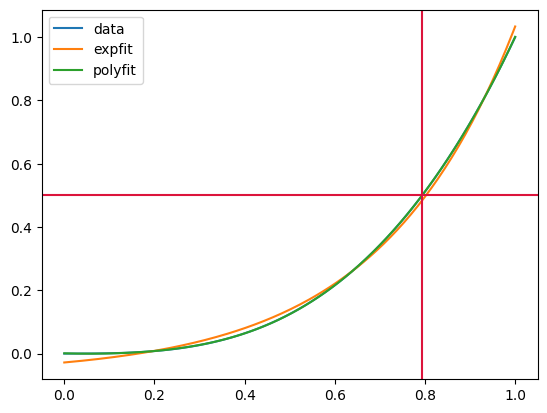

In [4]:
# Q1d
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, fsolve
'''To find the fraction f required for p_3pass to be 50%, we produce a probability density function for p_3pass and find f for p = 0.5'''

f_space = np.linspace(0,1,200)

def Binom_Prob(N_successes, N_trials, Prob_success):
    binom_coeff = math.factorial(N_trials)/(math.factorial(N_successes)*math.factorial(abs(N_trials - N_successes)))
    return binom_coeff*(Prob_success**N_successes) * (1 - Prob_success)**(N_trials-N_successes)

p_space = Binom_Prob(3,3,f_space)

def exponential(x,a,b,c):
    return a * np.exp(b*x) + c


def highordpoly(x,a0,a1,a2,a3,a4,a5,a6):
    return a0 +a1 * x + a2 * x**2 + a3 * x**3 + a4 * x**4 + a5 * x**5 + a6 + x**6


exp_coeff, exp_cov = curve_fit(exponential, f_space, p_space)

print(exp_coeff)
print(exp_cov)

poly_coeff, poly_cov = curve_fit(highordpoly, f_space, p_space)



def solve_highordpoly(x, *args):
    return highordpoly(x, *args) - 0.5

initial_guess = 0.7
root = fsolve(solve_highordpoly, initial_guess, args=tuple(poly_coeff))
print(root[0])


plt.plot(f_space, p_space, label='data')
plt.plot(f_space, exponential(f_space, *exp_coeff), label='expfit')
plt.plot(f_space, highordpoly(f_space, *poly_coeff), label='polyfit')
plt.axvline(x=root[0], color='crimson')
plt.axhline(y=0.5, color='crimson')
plt.legend(loc='upper left')

# Q1e

This is not a good model for the probability of students passing these modules.

It fails to account for the fact that in real degrees, modules are designed to work in tandem. It assumes that these modules are independent.
It also assumes that the probability of passing each module is equally proportional to the attendance fraction. This may not be the case for a variety of factors including but not limited to: Teacher quality, difficulty of the module, student ability in different subject areas.

***

##  QUESTION 2

A group researching cancer have previously found that the genetic marker D3 is a useful indication that a person will develop the more aggressive form of melanoma skin cancer, in that D3 is present in 65% of the aggressive cases. However the test is expensive.  A rival group claim that the marker M23 is more sensitive than D3, and works out considerably cheaper to test for. The rival research team manage to get DNA samples from 7 patients with the aggressive form of the disease, all of whom test positive for the genetic marker M23. Based on these results, is M23 a better marker for the disease than D3? 

Give full mathematical working for your reasoning, and show labeled plots of the underlying functions.    

**[20 marks]**

**Answer:**

***

## QUESTION 3 

A computer chip manufacturer suspects that roughly half of its latest batch of CPUs contains a flaw.  The accounts department are clearly concerned, and are trying to predict how the fault will affect the number of customers returning products. How many CPUs from the batch would they need to examine to know the probability that any given CPU is faulty to better than 2.5%?

Tip: think carefully about what you are trying to estimate here, you want the *error in your success probability* to be less than 2.5%.

**[15 marks]**

In [39]:
p_flaw = 0.5
p_work = 1-p_flaw

def Binom_Prob(N_successes, N_trials, Prob_success):
    binom_coeff = math.factorial(N_trials)/(math.factorial(N_successes)*math.factorial(abs(N_trials - N_successes)))
    return binom_coeff*(Prob_success**N_successes) * (1 - Prob_success)**(N_trials-N_successes)

trials = np.arange(2,1024,2)
successes = np.arange(1,512,1)

# print(trials)

binom_coeffs = []
for i in range(len(trials)):
    isuc = successes[i]
    itri = trials[i]
    coeff = Binom_Prob(isuc, itri, p_work)
    if coeff < 0.025:
        print("Trials = {0} for probability of knowing if CPU faulty < 2.5%".format(itri))
        break



Trials = 1020 for probability of knowing if CPU faulty < 2.5%


***

## QUESTION 4 

The state of Florida is thinking of relaxing its policy on alcohol sales, to allow supermarkets to sell hard alcohol, since the police predict that this can reduce violence. After some extensive polling, they find that only 35% and 10% of Republican and Independent voters are, respectively, behind the change in the law, while 80% of the Democrat voters are in favour.  You are visiting the state, and ask a Police Officer what she thinks of the idea. They says they're against the change to the law. What is the probability that they votes Democrat?


You may assume that voting in the Florida polls that year was split in the following way: 40% Democrat and 36% Republican. You can also assume that Independent covers everything that is not Republican or Democrat. 

**[25 marks]**

In [40]:
'''
Need to consider the following:
- p Dem and Support
- p Dem and Oppose
- p Rep and Support
- p Rep and Oppose
- p Ind and Support
- p Ind and Oppose
'''

p_dem = 0.4
p_rep = 0.36
p_ind = 0.24

p_dem_support = 0.80
p_rep_support = 0.35
p_ind_support = 0.10

p_dem_oppose = 1 - p_dem_support
p_rep_oppose = 1 - p_rep_support
p_ind_oppose = 1 - p_ind_support

p_oppose = p_dem*p_dem_oppose + p_rep*p_rep_oppose + p_ind*p_ind_oppose
p_support = 1 - p_oppose

print('{:.2f}'.format(p_support))
print('{:.2f}'.format(p_oppose))

# need probability they oppose given they are a democrat

def Bayes(pba,pa,pb):
    pab = pba * pa/ pb
    return pab

# want prob dem (A) given oppose (B)
# need:
# probability of opposing given dem = p_dem_oppose = 1 - p_dem_support -> pba
# probability of dem -> pa
# probability of oppose -> pb

prob_dem_give_oppose = Bayes(p_dem_oppose, p_dem, p_oppose)
print('Probability the Police Officer is a democrat given they oppose the bill = {:.2f}'.format(prob_dem_give_oppose))

0.47
0.53
Probability the Police Officer is a democrat given they oppose the bill = 0.15


***

## QUESTION 5

Ten new recruits for a basketball team are timed (in secs) in running the 100 meters and 1,500m races to determine how fast they can run. The following results were obtained,

| Distance | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |9 | 10 |  
| --- | --- | --- | --- | --- | --- | --- | --- | --- |--- |--- |
| 100m: | 11 | 12 | 12 | 13 |13 | 15 |11 | 16 |11 | 12 |
| 1500m: | 270 | 300 |230 | 260 |270 | 230 |260 | 240 | 270 | 260 |

What trends do we see in the data above? Are they significant? Use appropriate tests to answer this question.

Please **create your own** statistical functions when answering this question. Please include any sources you have used to answer this question.  

**[30 marks]**

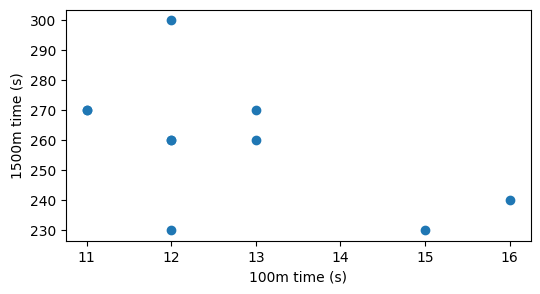

There doesn't appear to be a strong correlation here, but perhaps a weak negative one.


In [41]:
import matplotlib.pyplot as plt

# enter the times as lists
t_100 = [11,12,12,13,13,15,12,16,11,12]
t_1500 = [270,300,230,260,270,230,260,240,270,260]

# plot the 100m times against the 1500m times 
plt.figure(figsize=(6,3))
plt.scatter(t_100,t_1500)
plt.xlabel('100m time (s)')
plt.ylabel('1500m time (s)')
plt.show()

print("There doesn't appear to be a strong correlation here, but perhaps a weak negative one.")

In [42]:
from scipy.stats import pearsonr
import numpy as np

# define a function to calculate a correlation coefficient
def r_coeff(data1, data2):
    # determine the mean of each data set
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    # calculate the sum of the product of the distance of data from mean for each set
    numerator = np.sum((data1 - mean1)*(data2 - mean2))
    # calculate the sum of the square distances
    denom_pt1 = np.sum((data1 - mean1)**2)
    denom_pt2 = np.sum((data2 - mean2)**2)
    # calculate coefficient
    r = numerator/np.sqrt(denom_pt1 * denom_pt2)
    return r

correl = r_coeff(t_100,t_1500)

print('Correlation between 100m time and 1500m time = {:.2f}'.format(correl))

# null hypothesis: there is no correlation between 100m time and 1500m time
# therefore r = 0

# want probability that there is no correlation given we know that the correlation for our sample is -0.55

# not sure how to do this manually.

_, p_value = pearsonr(t_100,t_1500)

print('probability of no correlation given data is {:.2f}'.format(p_value))
print('This is not strong evidence in favour of this being a true correlation but not weak enough to accept the null hypothesis that there is no correlation between 100m time and 1500m.')

Correlation between 100m time and 1500m time = -0.55
probability of no correlation given data is 0.10
This is not strong evidence in favour of this being a true correlation but not weak enough to accept the null hypothesis that there is no correlation between 100m time and 1500m.
